In [9]:
import numpy as np
import pandas as pd
#from Functions import *
import datetime
import seaborn as sns

In [3]:
url = "https://data.ct.gov/api/views/rybz-nyjw/rows.csv?accessType=DOWNLOAD"
Drug_Deaths = pd.read_csv(url)
url2 = "https://data.ct.gov/api/views/erbt-mpgb/rows.csv?accessType=DOWNLOAD"
Addiction_Treatment = pd.read_csv(url2)

## Exploratory Data Analysis

In [4]:
Drug_Deaths.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [5]:
Addiction_Treatment.head()

,FiscalYear,MonthYear,Town,AdmMonth,FYMonthOrder,AdmYear,PrimaryDrug,AdmCount
0,2014,Jan-14,Ansonia,1,7,2014,Alcohol,14.0
1,2014,Jan-14,Ansonia,1,7,2014,Crack,NaN
2,2014,Jan-14,Ansonia,1,7,2014,Heroin,8.0
3,2014,Jan-14,Ansonia,1,7,2014,"Marijuana, Hashish, THC",NaN
4,2014,Jan-14,Ansonia,1,7,2014,Other Opiates and Synthetics,NaN


### EDA for Drugs_Death

In [6]:
##Finding the number of null values in each column
Drug_Deaths.isnull().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

In [7]:
#Get the number of rows and columns 
Drug_Deaths.shape

(5105, 41)

In [13]:
#Get datatypes of columns
Drug_Deaths.dtypes

ID                      object
Date                    object
DateType                object
Age                    float64
Sex                     object
Race                    object
ResidenceCity           object
ResidenceCounty         object
ResidenceState          object
DeathCity               object
DeathCounty             object
Location                object
LocationifOther         object
DescriptionofInjury     object
InjuryPlace             object
InjuryCity              object
InjuryCounty            object
InjuryState             object
COD                     object
OtherSignifican         object
Heroin                  object
Cocaine                 object
Fentanyl                object
FentanylAnalogue        object
Oxycodone               object
Oxymorphone             object
Ethanol                 object
Hydrocodone             object
Benzodiazepine          object
Methadone               object
Amphet                  object
Tramad                  object
Morphine

In [8]:
#Get the number of deaths due to each drug
Drug_names=["Heroin","Cocaine","Fentanyl","FentanylAnalogue","Oxycodone","Oxymorphone","Ethanol","Hydrocodone","Benzodiazepine","Methadone","Amphet","Tramad","Morphine_NotHeroin","Hydromorphone","Other"]

for drug in Drug_names:
    print("Number of deaths due to: {} is {}".format(drug,Drug_Deaths[drug].notnull().sum()))

Number of deaths due to: Heroin is 2529
Number of deaths due to: Cocaine is 1521
Number of deaths due to: Fentanyl is 2232
Number of deaths due to: FentanylAnalogue is 389
Number of deaths due to: Oxycodone is 607
Number of deaths due to: Oxymorphone is 108
Number of deaths due to: Ethanol is 1247
Number of deaths due to: Hydrocodone is 118
Number of deaths due to: Benzodiazepine is 1343
Number of deaths due to: Methadone is 474
Number of deaths due to: Amphet is 159
Number of deaths due to: Tramad is 130
Number of deaths due to: Morphine_NotHeroin is 42
Number of deaths due to: Hydromorphone is 25
Number of deaths due to: Other is 435


AttributeError: 'Rectangle' object has no property 'dropna'

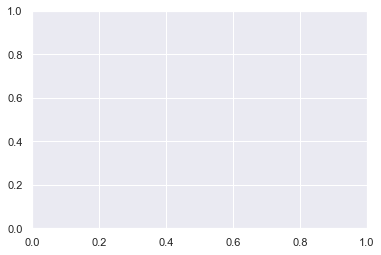

In [16]:
#Get the number of males and females
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex", data=Drug_Deaths, data=Drug_Deaths)

## Hypothesis I :
The proportion of deaths vs the total number of people admitted for the consumption of the drug Heroin is greater than the proportion of deaths vs the total number of people admitted for the consumption of the drug Cocaine.

Extracting Date Col as a seperate Col for Admissions File

In [8]:
Drug_Deaths = extract_year(Drug_Deaths) # calling the function to get year col in Drug Deaths 
# Creating a new dataframe to store the date for years 2014-2016

Drug_Deaths_Clean = Drug_Deaths[(Drug_Deaths.FiscalYear == 2014) | (Drug_Deaths.FiscalYear == 2015) | (Drug_Deaths.FiscalYear == 2016)]

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,FiscalYear
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",2014
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,2016
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN,2016
5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,Accident,"BRISTOL, CT\n(41.673037, -72.945791)","BRISTOL, CT\n(41.673037, -72.945791)","CT\n(41.575155, -72.738288)",2014
11,15-0334,07/05/2015 12:00:00 AM,DateReported,49.0,Female,White,NaN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,Y,Accident,"New Haven, CT\n(41.308252, -72.924161)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,14-0166,04/17/2014 12:00:00 AM,DateofDeath,56.0,Male,White,PLYMOUTH,NaN,NaN,PLYMOUTH,...,NaN,NaN,NaN,NaN,NaN,Accident,"PLYMOUTH, CT\n(41.671982, -73.052909)","PLYMOUTH, CT\n(41.671982, -73.052909)","CT\n(41.575155, -72.738288)",2014
5099,15-0013,01/07/2015 12:00:00 AM,DateReported,45.0,Female,White,WATERBURY,NEW HAVEN,CT,WATERBURY,...,NaN,NaN,NaN,NaN,Y,Accident,"WATERBURY, CT\n(41.554261, -73.043069)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)",2015
5100,15-0466,09/08/2015 12:00:00 AM,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,NaN,NaN,NaN,NaN,NaN,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)",2015
5103,14-0124,03/16/2014 12:00:00 AM,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,NaN,NaN,NaN,NaN,NaN,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",2014
